In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt


In [6]:
from pandas import DataFrame, Series

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
c_cycle=("#3498db","#e74c3c","#1abc9c","#9b59b6","#f1c40f","#ecf0f1","#34495e",
                  "#446cb3","#d24d57","#27ae60","#663399", "#f7ca18","#bdc3c7","#2c3e50")
mpl.rc('font', family='Bitstream Vera Sans', size=20)
mpl.rc('lines', linewidth=2,color="#2c3e50")
mpl.rc('patch', linewidth=0,facecolor="none",edgecolor="none")
mpl.rc('text', color='#2c3e50')
mpl.rc('axes', facecolor='none',edgecolor="none",titlesize=25,labelsize=15,color_cycle=c_cycle,grid=False)
mpl.rc('xtick.major',size=10,width=0)
mpl.rc('ytick.major',size=10,width=0)
mpl.rc('xtick.minor',size=10,width=0)
mpl.rc('ytick.minor',size=10,width=0)
mpl.rc('ytick',direction="out")
mpl.rc('grid',color='#c0392b',alpha=0.3,linewidth=1)
mpl.rc('legend',numpoints=3,fontsize=15,borderpad=0,markerscale=3,labelspacing=0.2,frameon=False,framealpha=0.6,handlelength=1,handleheight=0.5)
mpl.rc('figure',figsize=(10,6),dpi=80,facecolor="none",edgecolor="none")
mpl.rc('savefig',dpi=100,facecolor="none",edgecolor="none")

In [9]:
weather = pd.read_table("daily_weather.tsv")

In [10]:
usage = pd.read_table("usage_2012.tsv")

In [11]:
stations = pd.read_table("stations.tsv")

In [12]:
weather.loc[weather['season_code'] == 1, 'season_desc'] = 'winter'


In [13]:
weather.loc[weather['season_code'] == 2, 'season_desc'] = 'spring'

In [14]:
weather.loc[weather['season_code'] == 3, 'season_desc'] = 'summer'


In [15]:
weather.loc[weather['season_code'] == 4, 'season_desc'] = 'fall'


In [30]:
weather['date'] = pd.to_datetime(weather['date'])

In [31]:
month_rental = weather.groupby(weather['date'].dt.month)['total_riders'].sum()

In [32]:
mean = weather.groupby('season_desc')['temp'].mean()

###To start with, we'll need to compute the number of rentals per station per day. Use pandas to do that.

In [33]:
count = usage['station_start'].value_counts()

In [34]:
average_rental_df = DataFrame({ 'average_rental' : count / 365})

In [35]:
average_rental_df = DataFrame({ 'station' : stations['station']}, { 'average_rental' : count / 365})

###a. Our stations data has a huge number of quantitative attributes: fast_food, parking, restaurant, etc... Some of them are encoded as 0 or 1 (for absence or presence), others represent counts. To start with, run a simple linear regression where the input (x) variables are all the various station attributes and the output (y) variable is the average number of rentals per day.

In [36]:
from sklearn import linear_model

In [37]:
average_rental_df = DataFrame({ 'average_rental' : count / 365})

In [38]:
indexed_avg_df = DataFrame(average_rental_df.index, columns=['station'])

In [39]:
indexed_avg_df['avg_rentals'] = average_rental_df.values

In [40]:
indexed_avg_df['station'] = average_rental_df.index

In [43]:
avgerage_stations_df = pd.merge(left=indexed_avg_df, right=stations, on='station')

In [45]:
x = avgerage_stations_df[list(avgerage_stations_df.columns.values[8:])]
y = avgerage_stations_df[list(avgerage_stations_df.columns.values[1:2])]

In [46]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

###Plot the predicted values (model.predict(x)) against the actual values and see how they compare.

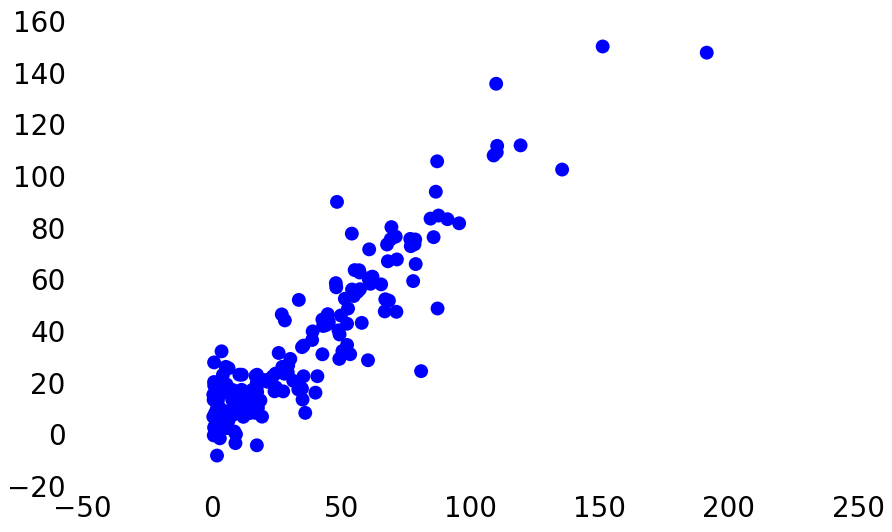

In [48]:
plt.scatter(y, linear_reg.predict(x), s=100)
plt.show()

###c. In this case, there are 129 input variables and only 185 rows which means we're very likely to overfit. Look at the model coefficients and see if anything jumps out as odd.



In [53]:
linear_reg.coef_


array([[  2.31721704e+00,  -2.14932061e-01,   5.55710831e-02,
         -6.33034472e+01,   1.95461168e+00,  -4.30632265e+00,
          5.51850630e+00,   1.90775768e+00,  -3.78606353e-01,
          7.83669551e-12,   2.47157737e+00,   6.92093575e+01,
          4.55079500e+00,   5.25217425e-12,  -1.24598788e-12,
          5.24796402e+00,   1.26818374e-11,   4.71211429e+00,
          9.12405995e+00,  -3.03680165e+00,   3.23088610e+00,
         -3.75439309e+01,   2.80098019e+01,  -3.85041448e+01,
         -1.56214076e+01,   2.12991919e+01,   1.52771531e+00,
          3.03238328e+00,  -4.28998558e+00,   8.94580818e+00,
          2.12991919e+01,  -2.85293190e-01,   3.24996230e+00,
          1.29635558e+01,   4.81656870e+00,  -1.97777901e+00,
         -3.44530831e+01,  -1.67244489e+01,   5.32312313e+00,
          5.04749123e+00,   1.14823383e+01,  -5.85187161e+00,
          1.48491231e+02,  -5.72315824e+00,  -1.28867680e+01,
          1.82383250e+02,  -4.46662968e-02,   4.04835029e-01,
        

###d. Go back and split the data into a training set and a test set. Train the model on the training set and evaluate it on the test set. How does it do?